# Cryptography Basics

## Modular Arithmetic

$x$ and $x'$ have the same remainder when divided by $N$:

$$x = x' \bmod N$$

if and only if $N$ devides $x - x'$, i.e. if $\frac{a − b}{n}$ has a remainder of $0$.

The **bracket notation** denotes the **remainder** when $x$ divided by $N$:

$$[x \bmod N]$$

i.e. the unique value $x' \in \{0, \ldots, N-1\}$ such that $x = x' \bmod N$

---

A number $x \bmod N$ is the equivalent of asking for the remainder of $x$ when divided by $N$. 

Two integers $a$ and $b$ are said to be **congruent** (or in the same equivalence class) modulo $N$ if they have the same remainder upon division by $N$. In such a case, we say that 

$$a \equiv b \pmod N$$

<br>

#### Addition in Modular Arithmetic

1. If $a + b = c$, then $a \pmod N + b \pmod N \equiv c \pmod N$

2. If $a \equiv b \pmod N$, then $a + k \equiv b + k \pmod N$ for any integer $k$

3. If $a \equiv b \pmod N$ and $c \equiv d \pmod N$, then $a + c \equiv b + d \pmod N$

4. If $a \equiv b \pmod N$, then $-a \equiv -b \pmod N$

<br>

#### Multiplication in Modular Arithmetic

1. If $a \cdot b = c$, then $a \pmod N \cdot b \pmod N \equiv c \pmod N$

2. If $a \equiv b \pmod N$, then $k \cdot a \equiv k \cdot b \pmod N$ for any integer $k$

3. If $a \equiv b \pmod N$ and $c \equiv d \pmod N$, then $a \cdot c \equiv b \cdot d \pmod N$

<br>

#### Exponentiation in Modular Arithmetic

1. If $a \equiv b \pmod N$, then $a^k \equiv b^k \pmod N$ for any integer $k$

<br>

#### Division in Modular Arithmetic

1. If $\gcd(k, N) = 1$ and $k \cdot a \equiv k \cdot b \pmod N$, then $a \equiv b \pmod N$

This property is true, because if $k \cdot (a−b)$ is a multiple of $N$ and $\gcd(k, N) = 1$, then $N$ must divide $a-b$, or equivalently $a \equiv b \pmod N$.

**Example**: Consider $4 \equiv 8 \pmod 4$. Note that we cannot simply divide both sides of the equation by $2$, since $2 \not \equiv 4 \pmod 4$.

<br>

#### Multiplicative Inverse in Modular Arithmetic

If $a$ and $N$ are integers such that $\gcd(a, N) = 1$ (coprime or relatively prime), then there exists an integer $b$ such that $a \cdot b \equiv 1 \pmod N$. $b$ is called the multiplicative inverse of $a \bmod N$.

**Examples**:

* $2 \cdot 3 \equiv 1 \pmod{5}$
* $2 \cdot 6 \equiv 1 \pmod{11}$

In [42]:
# reference: https://en.wikipedia.org/wiki/Extended_Euclidean_algorithm#Pseudocode
def mod_inv(x, m):
    r0, r1 = x, m
    s0, s1 = 1, 0
    while r1 != 0:
        quotient = r0 // r1
        r0, r1 = r1, r0 - quotient * r1
        s0, s1 = s1, s0 - quotient * s1
    if r0 != 1:
        return None
    return s0 if s0 >= 0 else s0 + m

In [43]:
mod_inv(2, 11)

6

## Cryptography Principles

### Kerckhoffs's Principle

TODO

### Key Space

The **key space** should be large enough to prevent **brute-force**, exhaustive-search attacks.

# Private-Key Encryption

A **private-key encryption scheme** is defined by a **message space** $M$ and algorithms $\text{Gen}$, $\text{Enc}$ and $\text{Dec}$:

* $\text{Gen}$ (key generation algorithm): generates **key** $k$

* $\text{Enc}$ (encryption algorithm): takes key $k$ and **message** $m \in M$ as input; outputs **ciphertexst** $c$

$$c \gets \text{Enc}_k (m)$$

* $\text{Dec}$ (decryption algorithm): takes key $k$ and ciphertext $c$ as input; outputs message $m$ or "error"

$$m := \text{Dec}_k (c)$$

with

$$\text{Dec}_k(\text{Enc}_k(m)) = m$$

#### Note on the Notation

* The **left arrow** $\gets$ notation denotes assignment to the output of an algorithm that might be **randomized**. Meaning that the output of the algorithm may be different, even when run twice on the same set of inputs.

* The **colon equals** $:=$ denotes an assignment to the output of a **deterministic** algorithm. 

* A single **equal sign** $=$ denotes mathematical equality in contrast to an assignment.

## Shift Cipher

The Shift Cipher, a.k.a. Caesar Cipher, is defined as

* $M = \{\text{strings over lowercase English alphabet}\}$

* $Gen$: choose uniform $k \in \{0, \ldots, 25\}$

* $Enc_k(m_1 \ldots m_t)$: output $c_1 \ldots c_t$ where $c_i := m_i + k \pmod{26}$

* $Dec_k(c_1 \ldots c_t)$: output $m_1 \ldots m_t$ where $m_i := c_i - k \pmod{26}$

The **Shift Cipher** is **not secure** as it has only 26 possible keys, i.e. the **key space** has a size of $26$.

Given a ciphertext, try decrypting with every possible key. If ciphertext is long enough, only one possibility will "make sense".

In [39]:
class ShiftCipher:
    alpha = "abcdefghijklmnopqrstuvwxyz"

    def enc(self, key, text):
        ciphertext = ""
        for m in text:
            c = self.alpha[(self.alpha.find(m) + self.alpha.find(key)) % len(self.alpha)]
            ciphertext += c if m in self.alpha else m
        return ciphertext

    def dec(self, key, ciphertext):
        text = ""
        for c in ciphertext:
            m = self.alpha[(self.alpha.find(c) - self.alpha.find(key)) % len(self.alpha)]
            text += m if c in self.alpha else c
        return text

In [40]:
cipher = ShiftCipher()
cipher.enc('c', 'helloworld')

'jgnnqyqtnf'

In [82]:
cipher.dec('c', cipher.enc('c', 'helloworld'))

'helloworld'

## Vigenère Cipher

In the Vigenère cypher, the key is a string rather than just a single character:

* $M = \{\text{strings over lowercase English alphabet}\}$

* $Gen$: string $k \in \{k_1, \ldots, k_u\}$ with $k_i \in M$ and length $u$. String is wraped around if $u < t$

* $Enc_k(m_1 \ldots m_t)$: output $c_1 \ldots c_t$ where $c_i := m_i + k_i \pmod{26}$

* $Dec_k(c_1 \ldots c_t)$: output $m_1 \ldots m_t$ where $m_i := c_i - k_i \pmod{26}$

The size of the **key space** is ${26}^u$, e.g. if a key has a size $u = 14$, then the key space has a size of ${26}^{14} \approx 2^{66}$ which makes a brute-force search expersive or impossilble.

The **Vigenère Cipher** is not secure though, as there are other attack vectors.

In [93]:
class VigenereCipher:
    alpha = "abcdefghijklmnopqrstuvwxyz"

    def enc(self, key, text):
        ciphertext = ""
        for u, m in enumerate(text):
            k = key[u % len(key)]
            c = self.alpha[(self.alpha.find(m) + self.alpha.find(k)) % len(self.alpha)]
            ciphertext += c if m in self.alpha else m
        return ciphertext

    def dec(self, key, ciphertext):
        text = ""
        for u, c in enumerate(ciphertext):
            k = key[u % len(key)]
            m = self.alpha[(self.alpha.find(c) - self.alpha.find(k)) % len(self.alpha)]
            text += m if c in self.alpha else c
        return text

In [94]:
cipher = VigenereCipher()
cipher.enc('cafe', 'tellhimaboutme')

'veqpjiredozxoe'

In [95]:
cipher.dec('cafe', cipher.enc('cafe', 'tellhimaboutme'))

'tellhimaboutme'

### Breaking the Vigenère Ciper

The Vigenère Ciper can easily be attacked using **plaintext letter frequencies**.

In [65]:
import requests
import string
from collections import Counter
import matplotlib.pyplot as plt

url = 'https://www.gutenberg.org/cache/epub/1661/pg1661.txt' # The Project Gutenberg eBook of The Adventures of Sherlock Holmes

text = Counter([t for t in requests.get(url).text.lower() if t in string.ascii_lowercase])
s = sum(text.values())
letters = sorted(text)
frequencies = [text[c] / s * 100 for c in letters]

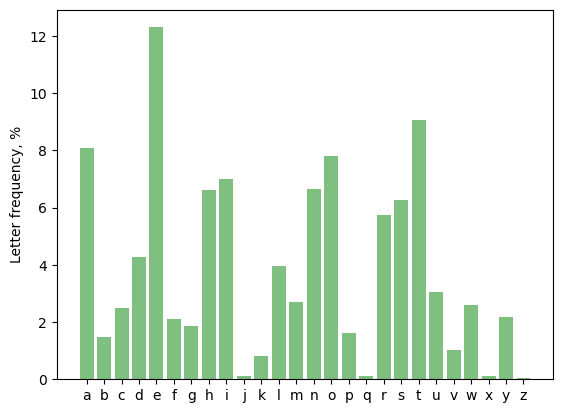

In [67]:
plt.ylabel('Letter frequency, %')
plt.bar(letters, frequencies, width=0.8, color='g', alpha=0.5);